In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Spam Email Detection - spam.csv")
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
775,ham,Thanks for picking up the trash.,NaN,NaN,NaN
2622,ham,Ok lor...,NaN,NaN,NaN
334,spam,Valentines Day Special! Win over �1000 in our ...,NaN,NaN,NaN
984,ham,Yo guess what I just dropped,NaN,NaN,NaN
2504,ham,"Hello, my boytoy! I made it home and my consta...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

## Data Cleaning and Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- I'll drop all the Unnamed columns as they are of no use and contain almost negligible information

In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
data.shape

(5572, 2)

In [8]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- I'll now rename the column names as "Result" i.e. Spam or ham and other one as Text

In [9]:
data.rename(columns={'v1':'Result','v2':'Text'},inplace=True)

In [10]:
data.sample(5)

,Result,Text
1244,ham,Now? I'm going out 4 dinner soon..
2843,ham,Today iZ Yellow rose day. If u love my frndshi...
1259,ham,We have sent JD for Customer Service cum Accou...
1743,ham,I love to wine and dine my lady!
5452,ham,What???? Hello wats talks email address?


In [17]:
data.index[1634]

1634

In [19]:
data['Result'].value_counts()

ham     4825
spam     747
Name: Result, dtype: int64

- Now, as there are spam and ham values, I will encode them using Labelencoder

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [24]:
data['Result'] = encoder.fit_transform(data['Result'])
data.sample(5)

,Result,Text
3010,0,"Hm good morning, headache anyone? :-)"
189,0,I jus reached home. I go bathe first. But my s...
1697,0,Hai priya are you right. What doctor said pa. ...
332,1,Call Germany for only 1 pence per minute! Call...
3513,0,I always chat with you. In fact i need money c...


In [25]:
# Spam = 1
# Ham = 0

In [26]:
# missing values
data.isna().sum()

Result    0
Text      0
dtype: int64

In [27]:
# duplicate values
data.duplicated().sum()

409

- I'll drop the duplicate values

In [28]:
data = data.drop_duplicates(keep = 'first')

In [29]:
data.duplicated().sum()

0

In [30]:
data.shape

(5163, 2)

In [31]:
data.sample(5)

,Result,Text
5095,0,K.k.this month kotees birthday know?
1121,1,Do you want 750 anytime any network mins 150 t...
3760,0,Was just about to ask. Will keep this one. May...
746,0,"I promise to take good care of you, princess. ..."
3709,0,ARE YOU IN TOWN? THIS IS V. IMPORTANT


In [32]:
data['Result'].value_counts()

0    4516
1     647
Name: Result, dtype: int64

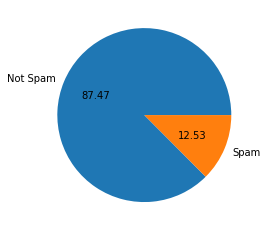

In [33]:
import matplotlib.pyplot as plt
plt.pie(data['Result'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

- As we can see from the Pie chart above that data is not in balanced format

In [34]:
import nltk

In [35]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
# Total characters in text

In [36]:
data['num_characters']=data['Text'].apply(len) # number of characters in a mail
data.rename(columns={'num_characters':'Character Count'},inplace=True)
data.head()

<ipython-input-36-4858b1e3cf6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_characters']=data['Text'].apply(len) # number of characters in a mail
C:\Users\Shubham\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Result,Text,Character Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
 # Breaking sentence into number of words
data['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5163, dtype: object

In [40]:
# counting the number of words used in the whole text
data['Word Count'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-40-0bb1883afd27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Word Count'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [42]:
data.tail()

,Result,Text,Character Count,Word Count
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27
5571,0,Rofl. Its true to its name,26,7


In [44]:
data['Sentence Count']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.tail(4)

<ipython-input-44-d2b34ba08537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentence Count']=data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Result,Text,Character Count,Word Count,Sentence Count
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1
5571,0,Rofl. Its true to its name,26,7,2


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Result           5163 non-null   int64 
 1   Text             5163 non-null   object
 2   Character Count  5163 non-null   int64 
 3   Word Count       5163 non-null   int64 
 4   Sentence Count   5163 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.0+ KB


In [46]:
data.describe()

,Result,Character Count,Word Count,Sentence Count
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.125315,78.811156,18.443734,1.959713
std,0.331108,58.153491,13.325627,1.432020
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [47]:
import seaborn as sns

<AxesSubplot:xlabel='Character Count', ylabel='Count'>

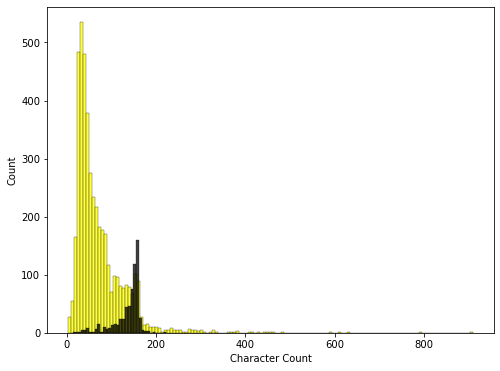

In [52]:
## Histogram plot
plt.figure(figsize=(8,6))
sns.histplot(data[data['Result']==0]['Character Count'],color = 'yellow')
sns.histplot(data[data['Result']==1]['Character Count'],color = 'black')

In [56]:
# character count in spam mails is comparatively low as compared to non spam messages 
# and same is the trend for word count as shown below

<AxesSubplot:xlabel='Word Count', ylabel='Count'>

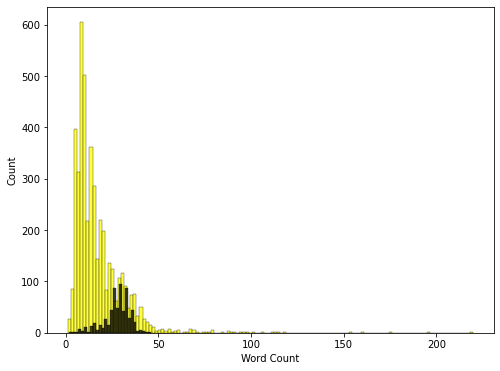

In [55]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Result']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['Result']==1]['Word Count'],color = 'black')

## Text Preprocessing

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- to stem words in text data

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('beginning')

'begin'

- writing a function to transform text data using above mentioned techniques

In [63]:
def transform_text(text):
    text = text.lower() # 1. Lower Case Convertion
    text = nltk.word_tokenize(text) # 2. Tokenization
    
    y=[] # 3. Removing special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. Removing stop words and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [66]:
transform_text(' BANK has become the first Indian bank to execute an export finance transaction on the International Trade Financing Services ')

'bank becom first indian bank execut export financ transact intern trade financ servic'

In [67]:
data['Transformed-Text']=data['Text'].apply(transform_text)

<ipython-input-67-3a15be922056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transformed-Text']=data['Text'].apply(transform_text)


In [69]:
data.sample(5)

,Result,Text,Character Count,Word Count,Sentence Count,Transformed-Text
4030,0,"Sorry vikky, i'm Watching olave mandara movie ...",84,17,1,sorri vikki watch olav mandara movi kano trish...
247,0,Kallis wont bat in 2nd innings.,31,7,1,kalli wont bat 2nd inning
3650,0,Want to send me a virtual hug?... I need one,44,12,2,want send virtual hug need one
4769,0,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...,62,15,3,cheer lou yeah goodnit shame u neva came c ya ...
1016,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,158,30,2,free 1st week no1 nokia tone 4 ur mob everi we...


- Word cloud on major words in Spam and non spam mail data

In [70]:
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=800,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['Result']==1]['Transformed-Text'].str.cat(sep=" "))

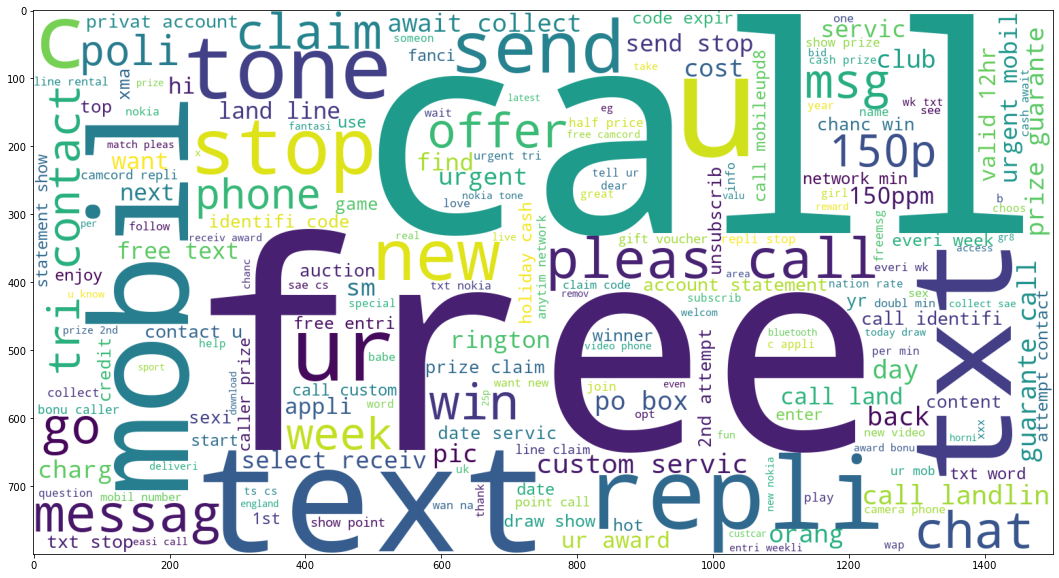

In [71]:
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

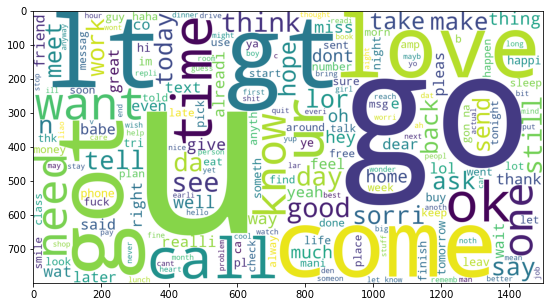

In [73]:
non_spam_wc = wc.generate(data[data['Result']==0]['Transformed-Text'].str.cat(sep=" "))
plt.figure(figsize=(12,5))
plt.imshow(non_spam_wc)

In [75]:
spam_word = []
for msg in data[data['Result']==1]['Transformed-Text'].tolist():
    for word in msg.split():
        spam_word.append(word)


In [76]:
from collections import Counter
Counter(spam_word)

Counter({'free': 188,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 46,
         'fa': 2,
         'cup': 3,
         'final': 13,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 30,
         'question': 9,
         'std': 6,
         'txt': 140,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 59,
         'rcv': 2,
         'winner': 13,
         'valu': 7,
         'network': 26,
         'custom': 40,
         'select': 26,
         'receivea': 1,
         'prize': 80,
         'reward': 7,
         'claim': 97,
         'cal

In [77]:
len(spam_word)

9861

In [78]:
pd.DataFrame(Counter(spam_word).most_common(30))

,0,1
0,call,316
1,free,188
2,2,155
3,txt,140
4,text,122
5,ur,119
6,u,117
7,mobil,110
8,stop,104
9,repli,103


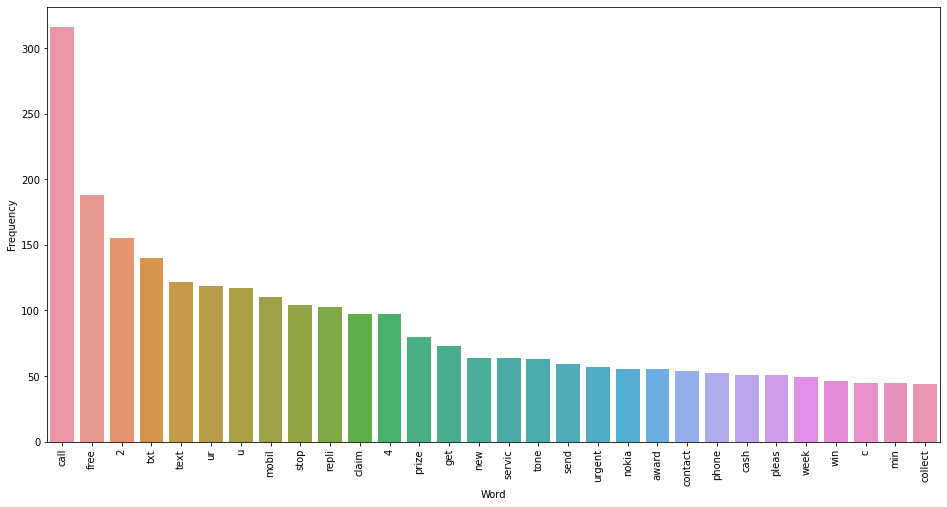

In [81]:
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(16, 8))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

- I'll use tfidf vectorizer

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [88]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()
y = data['Result'].values

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [105]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [106]:
# Initialize and train the models
models = {
    'Logistic Regression': lr,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb
}

In [107]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [108]:
train_classifier(lr,X_train, X_test, y_train, y_test)

(0.952565343659245, 0.9390243902439024)

In [110]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    # print(f'{name} - Accuracy: {current_accuracy:.4f} & Precision: {current_precision:.4f}')
    print("For",name)
    print("Accuracy:",current_accuracy)
    print("Precision:",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For Logistic Regression
Accuracy: 0.952565343659245
Precision: 0.9390243902439024
For DecisionTreeClassifier
Accuracy: 0.936108422071636
Precision: 0.8235294117647058
For KNN
Accuracy: 0.9080348499515973
Precision: 1.0
For RF
Accuracy: 0.9690222652468539
Precision: 0.989010989010989
For AdaBoost
Accuracy: 0.9545014520813165
Precision: 0.8854166666666666
For Bagging
Accuracy: 0.9583736689254598
Precision: 0.8421052631578947
For Extra Tree
Accuracy: 0.9738625363020329
Precision: 0.9895833333333334
For GradientBoosting
Accuracy: 0.9506292352371732
Precision: 0.926829268292683


In [115]:
result_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values

In [116]:
result_df

<bound method DataFrame.sort_values of                 Algorithm  Accuracy  Precision
0     Logistic Regression  0.952565   0.939024
1  DecisionTreeClassifier  0.936108   0.823529
2                     KNN  0.908035   1.000000
3                      RF  0.969022   0.989011
4                AdaBoost  0.954501   0.885417
5                 Bagging  0.958374   0.842105
6              Extra Tree  0.973863   0.989583
7        GradientBoosting  0.950629   0.926829>

In [133]:
data

,Result,Text,Character Count,Word Count,Sentence Count,Transformed-Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


### Applying model on whole data to compare real type of mail with predicted output

In [134]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()
y = data['Result'].values

In [137]:
model = lr.fit(X,y)
# Make predictions
predicted_output = model.predict(X)

# Attach predicted output to the testing data
data['predicted_output'] = predicted_output

<ipython-input-137-c08c3aed091c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_output'] = predicted_output


In [ ]:
# Spam = 1
# Non spam = 0

In [139]:
data.rename(columns={'Result':'Type'},inplace=True)

C:\Users\Shubham\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [140]:
data

,Type,Text,Character Count,Word Count,Sentence Count,Transformed-Text,predicted_output
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,0
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...,1
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home,0
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,0
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,0


- Here, I have applied few models and measured their accuracy and at the end, I have picked logistic regression and predicted the output for the whole dataset, and then attached the predicted output to each respective data record which indicates phishing attempts through that mail.

In [145]:
incorrect_output_count = (data['Type'] != data['predicted_output']).sum()

In [146]:
incorrect_output_count

180